## Import the required packages 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

## Import the data 

In [3]:
ceramic_df = pd.read_csv("Chemical Composion of Ceramic.csv")

ceramic_df.head()

,Ceramic Name,Part,Na2O,MgO,Al2O3,SiO2,K2O,CaO,TiO2,Fe2O3,MnO,CuO,ZnO,PbO2,Rb2O,SrO,Y2O3,ZrO2,P2O5
0,FLQ-1-b,Body,0.62,0.38,19.61,71.99,4.84,0.31,0.07,1.18,630,10,70,10,430,0,40,80,90
1,FLQ-2-b,Body,0.57,0.47,21.19,70.09,4.98,0.49,0.09,1.12,380,20,80,40,430,-10,40,100,110
2,FLQ-3-b,Body,0.49,0.19,18.60,74.70,3.47,0.43,0.06,1.07,420,20,50,50,380,40,40,80,200
3,FLQ-4-b,Body,0.89,0.30,18.01,74.19,4.01,0.27,0.09,1.23,460,20,70,60,380,10,40,70,210
4,FLQ-5-b,Body,0.03,0.36,18.41,73.99,4.33,0.65,0.05,1.19,380,40,90,40,360,10,30,80,150


In [24]:
ceramic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ceramic Name  88 non-null     object 
 1   Part          88 non-null     object 
 2   Na2O          88 non-null     float64
 3   MgO           88 non-null     float64
 4   Al2O3         88 non-null     float64
 5   SiO2          88 non-null     float64
 6   K2O           88 non-null     float64
 7   CaO           88 non-null     float64
 8   TiO2          88 non-null     float64
 9   Fe2O3         88 non-null     float64
 10  MnO           88 non-null     int64  
 11  CuO           88 non-null     int64  
 12  ZnO           88 non-null     int64  
 13  PbO2          88 non-null     int64  
 14  Rb2O          88 non-null     int64  
 15  SrO           88 non-null     int64  
 16  Y2O3          88 non-null     int64  
 17  ZrO2          88 non-null     int64  
 18  P2O5          88 non-null     in

## Explore interdependencies in the chemical ratios 

In [18]:
#Unique ceramic name to make sure all are unique 
len(ceramic_df['Ceramic Name'].unique())

88

In [16]:
# body and glaze tested for each so each can be seperatly evaluted to see if body and glaze overlap 
ceramic_df.groupby('Part')['Ceramic Name'].nunique()

Part
Body     44
Glaze    44
Name: Ceramic Name, dtype: int64

In [27]:
# Can use as an effective test and control to see if period align 
ceramic_body_df = ceramic_df[ceramic_df['Part'] == "Body"]
ceramic_glaze_df = ceramic_df[ceramic_df['Part'] == "Glaze"]

 Check the Chemical distribuition for each to see if there are any outliers 

In [24]:
# Create plot to show distibution and outliers to look into for each data frame
def plot_histograms(df):

    numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
    num_columns = len(numeric_columns)

    fig, axes = plt.subplots(num_columns, 1, figsize=(12, 30)) 

    for i, column in enumerate(numeric_columns):
        df[column].hist(ax=axes[i], edgecolor='black', grid=False)
        axes[i].set_title(f'Histogram of {column}')
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()




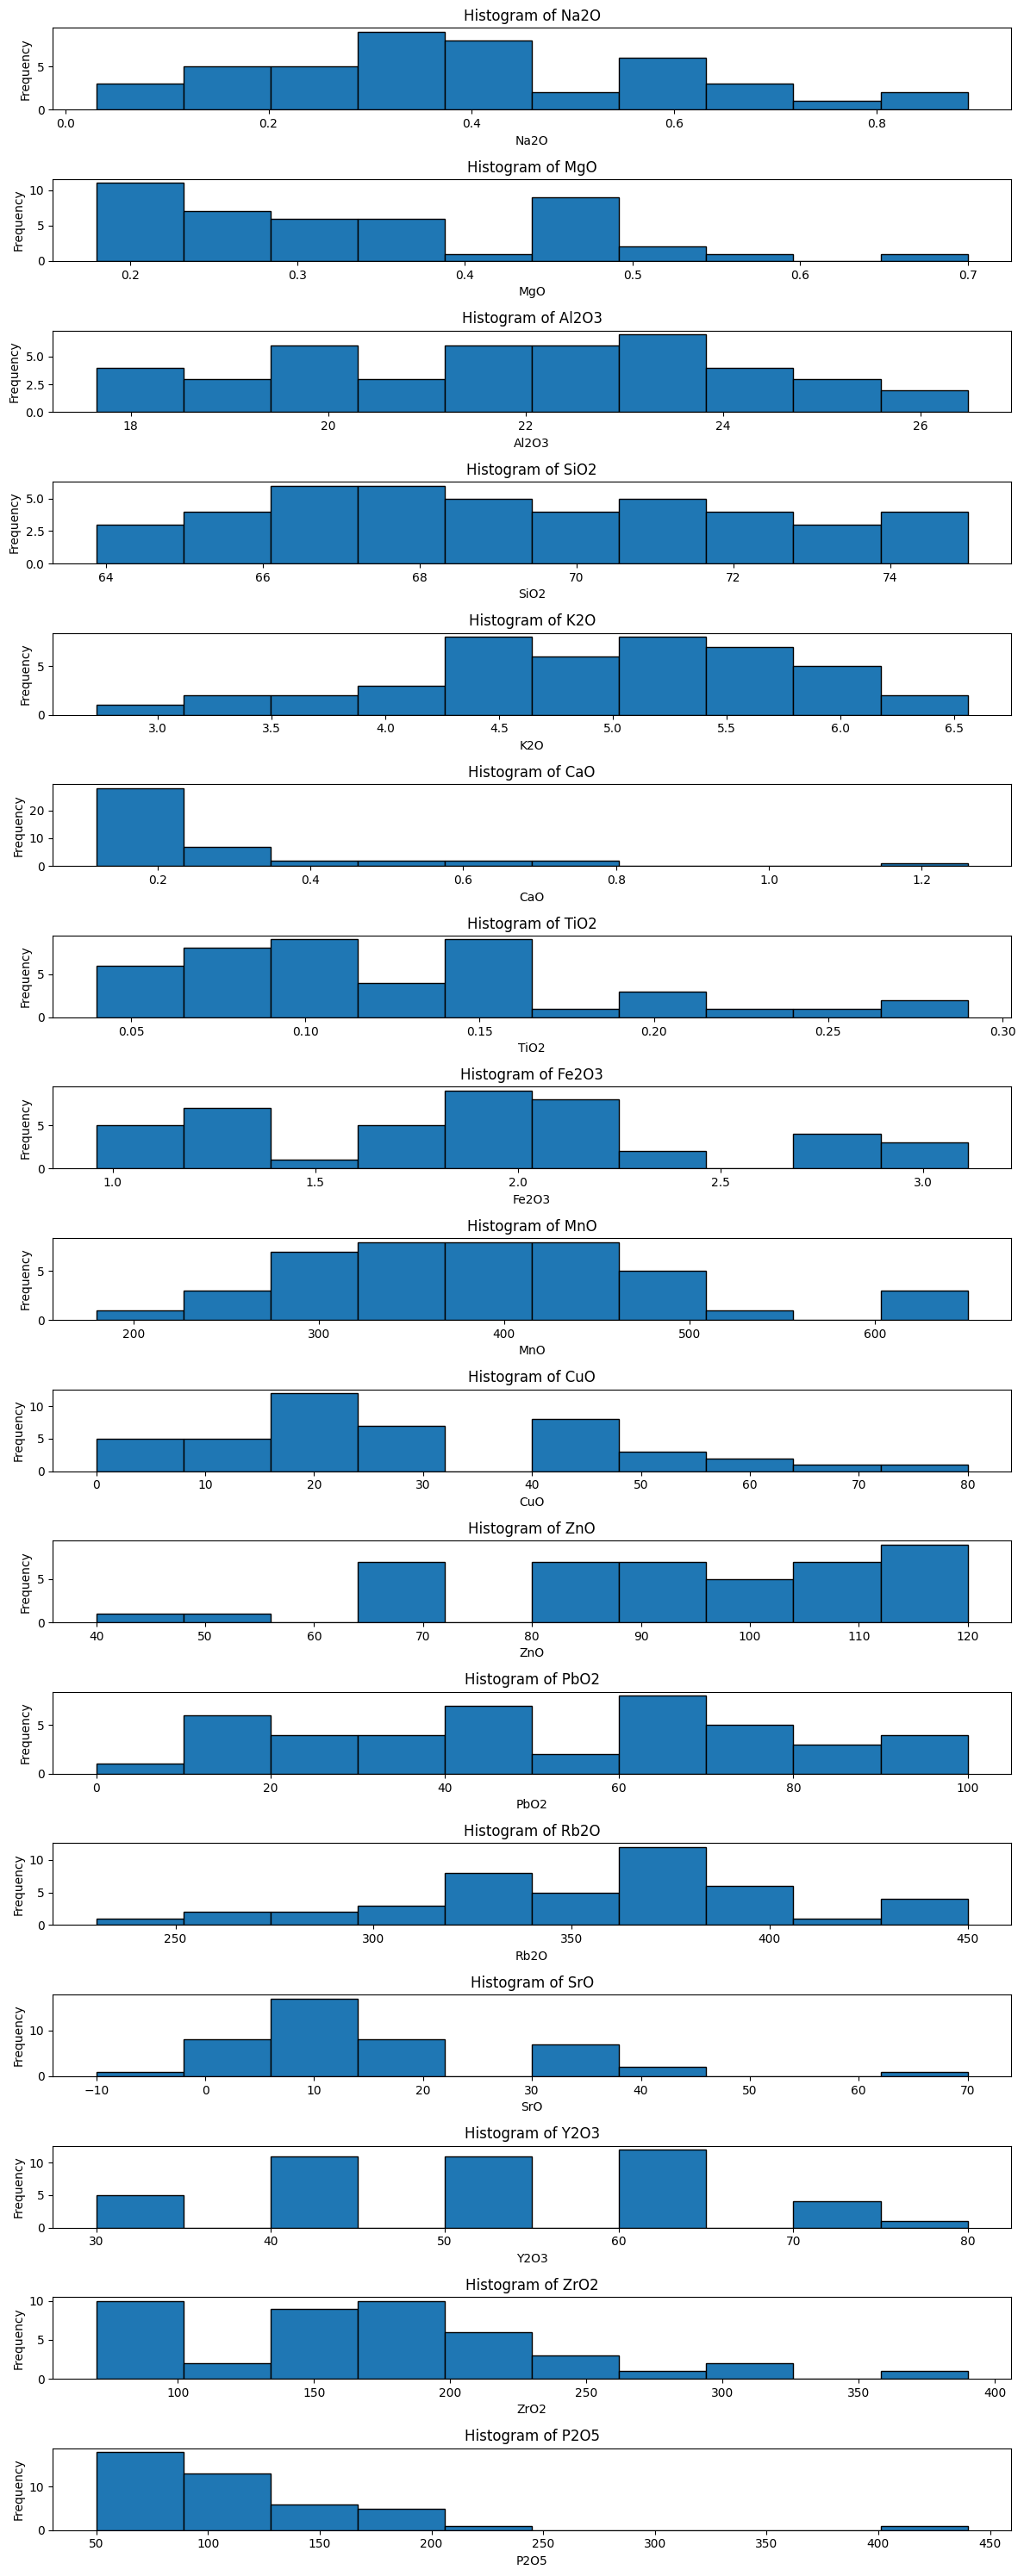

In [25]:
plot_histograms(ceramic_body_df)

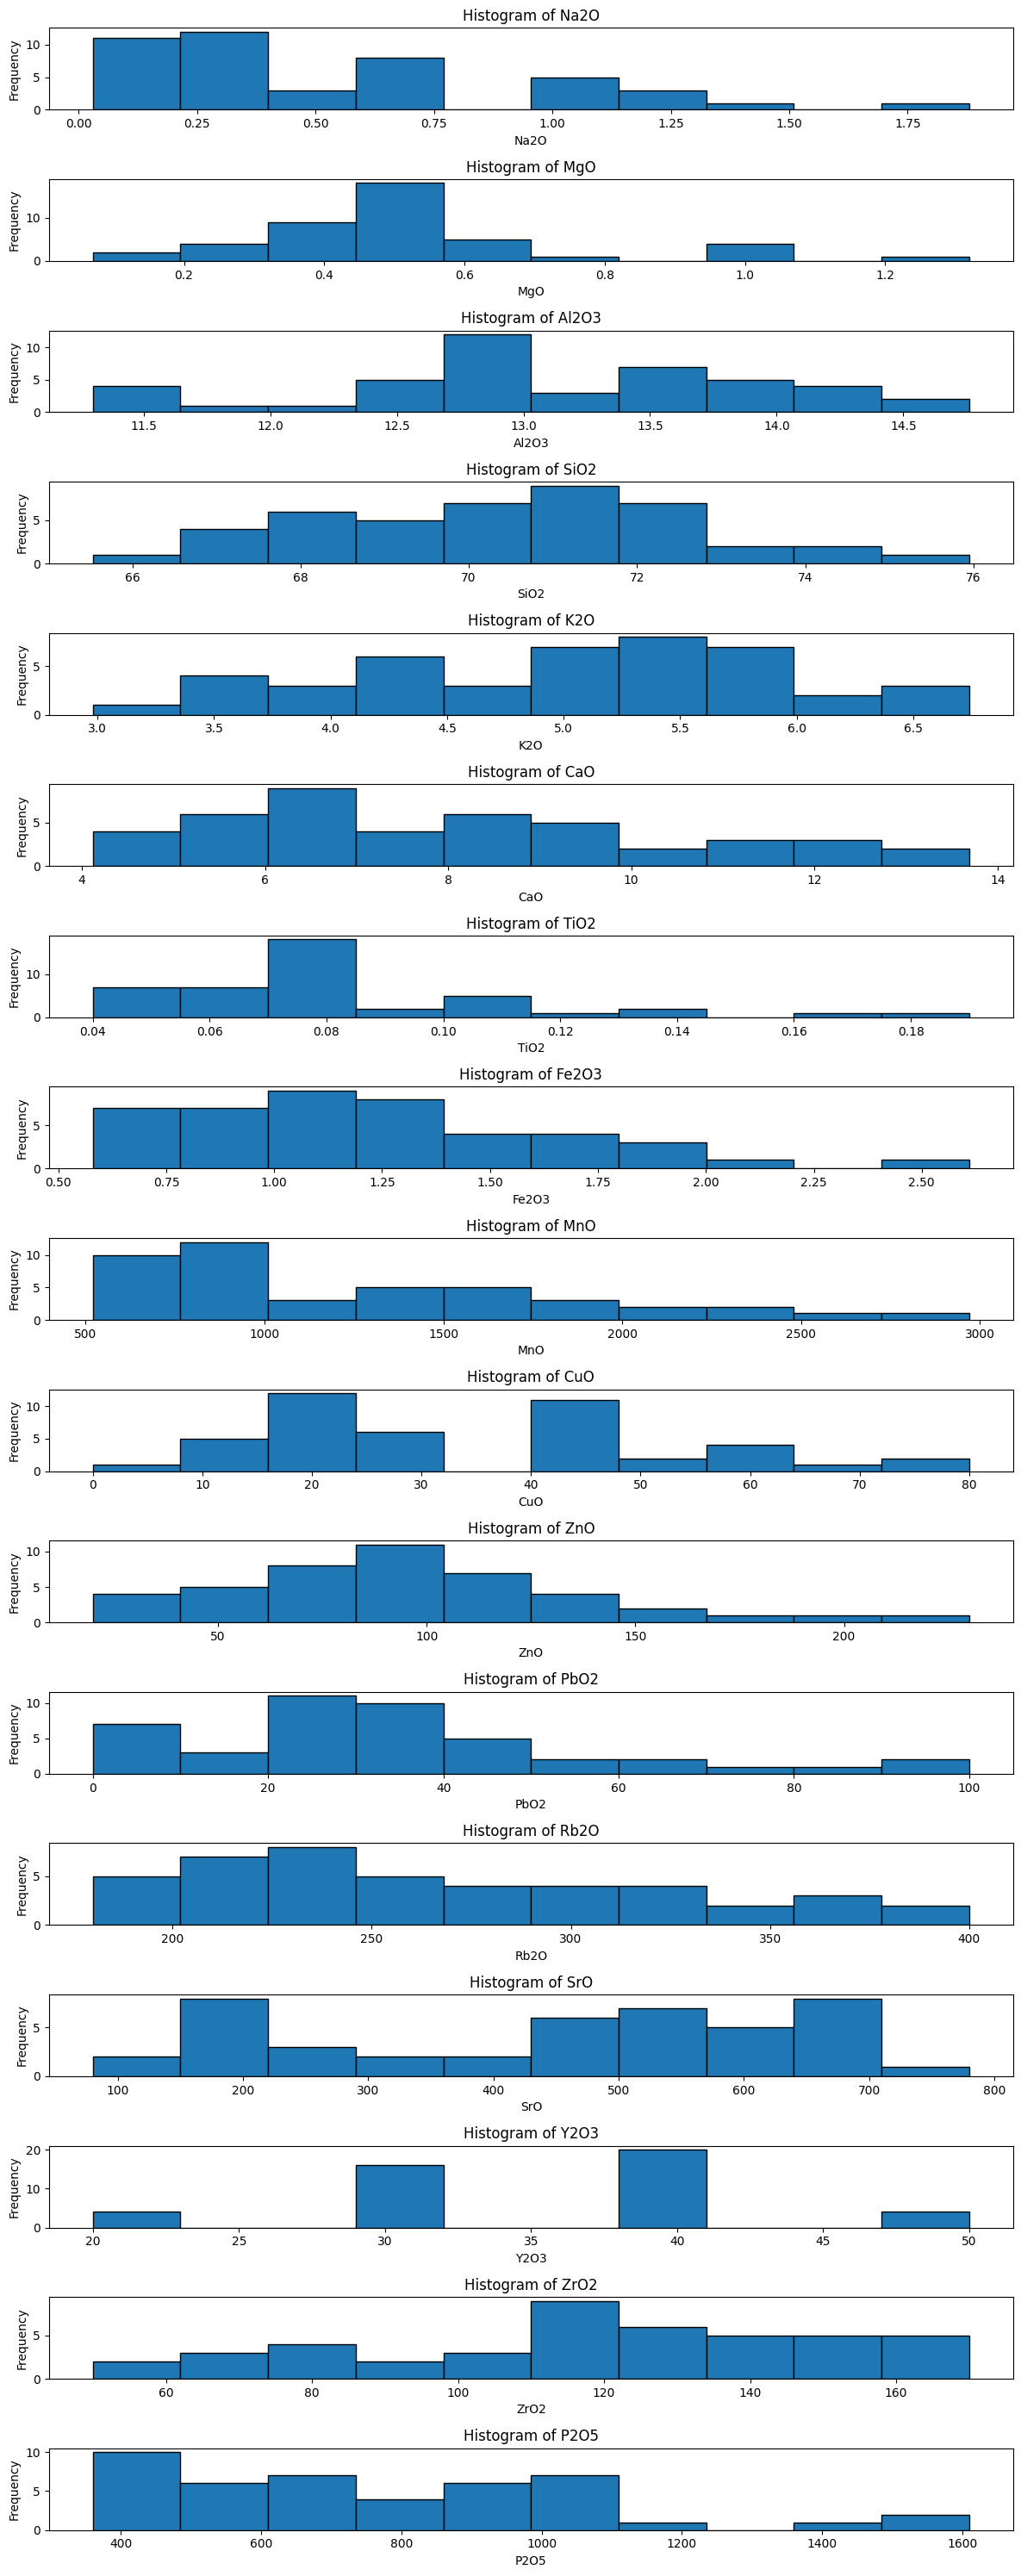

In [28]:
plot_histograms(ceramic_glaze_df)

In [ ]:
#Create function to show the heat map of correlations to investigate 